In [1]:
import anndata as ad
import numpy as np
import scanpy as sc
import pandas as pd
import openpyxl
import csv
import matplotlib
import scipy.stats as sp
import xgboost as xgb
import pickle
from sklearn.metrics import confusion_matrix, adjusted_rand_score
import matplotlib.pyplot as plt
from matplotlib import gridspec
import scrublet as scr

ImportError: DLL load failed while importing _multiarray_umath: 找不到指定的模块。

In [16]:
D_LP=sc.read_h5ad('F:/single cell data/LP_LGN/D_LP_preHVG.h5ad')

In [17]:
D_LP

AnnData object with n_obs × n_vars = 29521 × 20516
    obs: 'n_genes', 'percent_mito', 'n_counts', 'Doublet', 'Doublet Score', 'sample'
    var: 'gene_ids', 'feature_types', 'n_cells-D1_LP', 'n_cells-D2_LP'

In [18]:
D_LGN=sc.read_h5ad('F:/single cell data/LP_LGN/D_LGN_preHVG.h5ad')

In [19]:
D_LGN

AnnData object with n_obs × n_vars = 24440 × 20265
    obs: 'n_genes', 'percent_mito', 'n_counts', 'Doublet', 'Doublet Score', 'sample'
    var: 'gene_ids', 'feature_types', 'n_cells-D1_LGN', 'n_cells-D2_LGN'

E:\Python\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
E:\Python\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


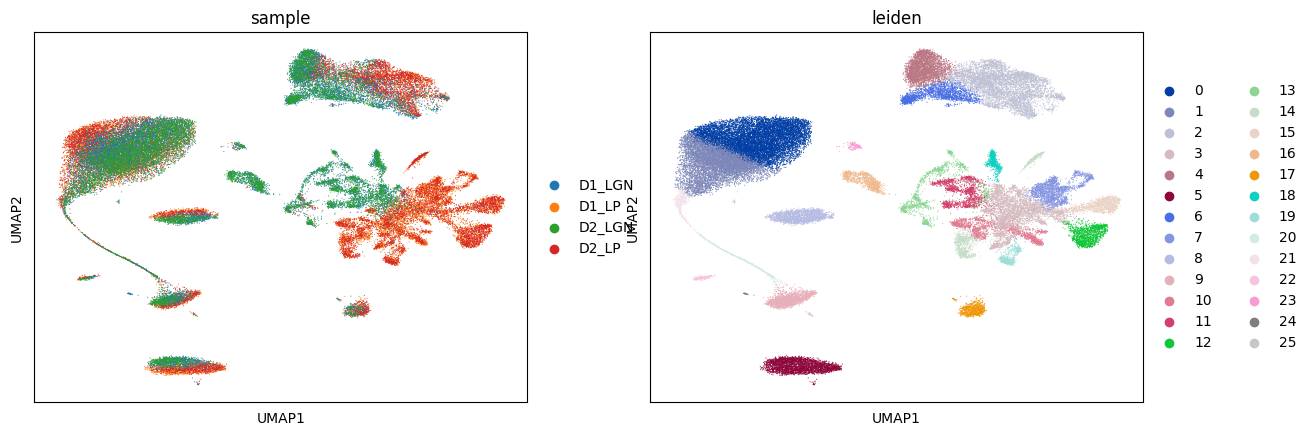

AnnData object with n_obs × n_vars = 53961 × 19751
    obs: 'n_genes', 'percent_mito', 'n_counts', 'Doublet', 'Doublet Score', 'sample', 'tissue', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells-D1_LGN-LGN', 'n_cells-D2_LGN-LGN', 'n_cells-D1_LP-LP', 'n_cells-D2_LP-LP', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'umap', 'sample_colors', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'


In [39]:
#D_LP_LGN =sc.AnnData.concatenate(D_LP, D_LGN,batch_categories=['LP','LGN'],batch_key='tissue')
#print(D_LP_LGN)
D_LP_LGN =sc.read_h5ad('F:/single cell data/LP_LGN/D_LP_LGN_preHVG.h5ad')
sc.pp.normalize_per_cell(D_LP_LGN,counts_per_cell_after= 1e4)
sc.pp.log1p(D_LP_LGN)
sc.pp.highly_variable_genes(D_LP_LGN, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.tl.pca(D_LP_LGN,svd_solver='arpack')
#sc.external.pp.harmony_integrate(D_LP,key='sample')
sc.pp.neighbors(D_LP_LGN,n_neighbors=25, n_pcs=40)
sc.tl.leiden(D_LP_LGN)
sc.tl.umap(D_LP_LGN)
sc.pl.umap(D_LP_LGN, color=['sample','leiden'],save='D_LP_LGN_sample&leiden.svg')
D_LP_LGN.write_h5ad('F:/single cell data/LP_LGN/D_LP_LGN_HVG.h5ad')
print(D_LP_LGN)

In [40]:
D_LP_LGN

AnnData object with n_obs × n_vars = 53961 × 19751
    obs: 'n_genes', 'percent_mito', 'n_counts', 'Doublet', 'Doublet Score', 'sample', 'tissue', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells-D1_LGN-LGN', 'n_cells-D2_LGN-LGN', 'n_cells-D1_LP-LP', 'n_cells-D2_LP-LP', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'umap', 'sample_colors', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [41]:
glut_gaba_marker_gene = ['Snap25','Gad2','Chrna6','Dscaml1','Styk1','Pde3a','Alyref','Dapk3','Pvalb','Htr1a','Penk','Stc1','Rspo2','Slc17a6','Slc17a7','Calb1','Gpr4','Scn4b','Adamts19',
               'Grin2c','Foxb1','Fzd5','C1ql2','Pax6','Nkx2-2','Tcf7l2','Gcnt4']

E:\Python\lib\site-packages\scanpy\plotting\_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


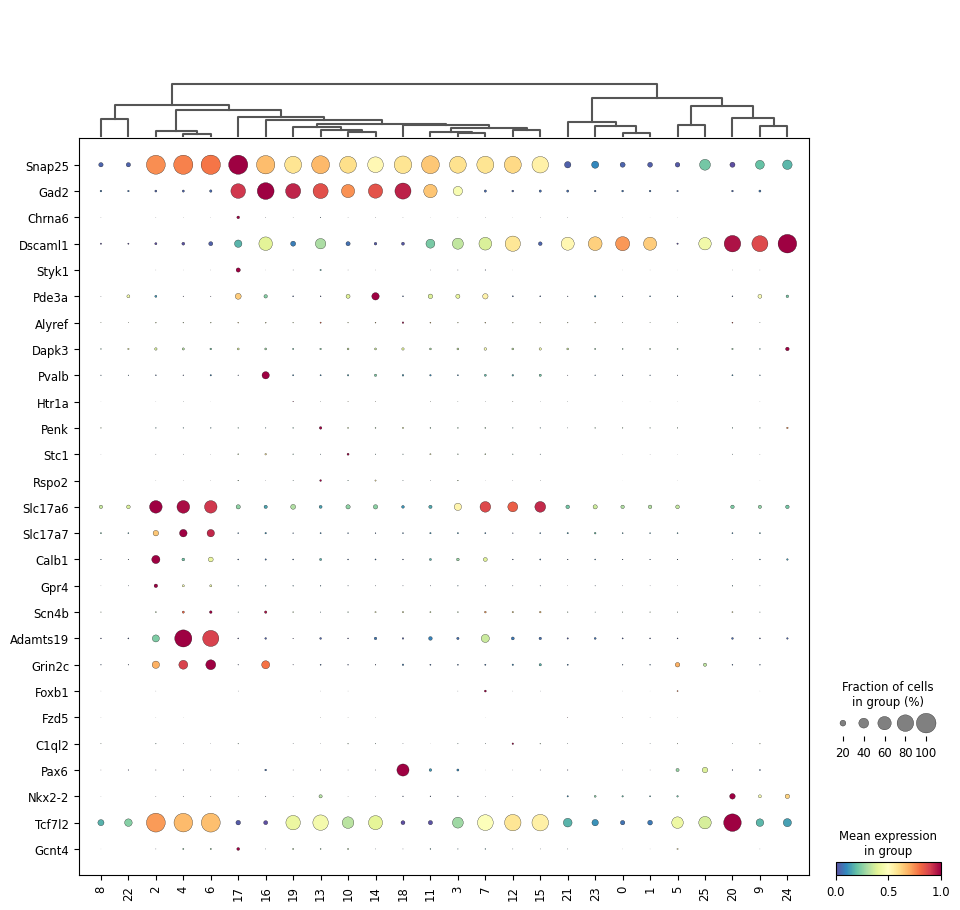

In [42]:
sc.pl.dotplot(D_LP_LGN, glut_gaba_marker_gene, groupby='leiden',dendrogram='True',swap_axes = 'True',
              cmap='Spectral_r', standard_scale='var',save='D_LP_LGN_celltype_glut_gaba_marker.svg')

In [43]:
non_neuron_marker_gene = ['Snap25','Gad2',
               'Sox9','Aqp4','Grin2b','Dao','Hs3st3a1','Otx2','Foxj1','Sspo','Ttr','Sox10','Apod','Pdgfra','Opalin','Foxc1',
               'Igf2','Slc6a20a','Vtn','Acta2','Myh11','Slco1a4','Flt1','Ikzf1','Ptprc','Ifitm10','Siglech','Csf3r','C1qa','F13a1','Mrc1',
               'Cd52','Fgr','Cd74','Ccl5']

E:\Python\lib\site-packages\scanpy\plotting\_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


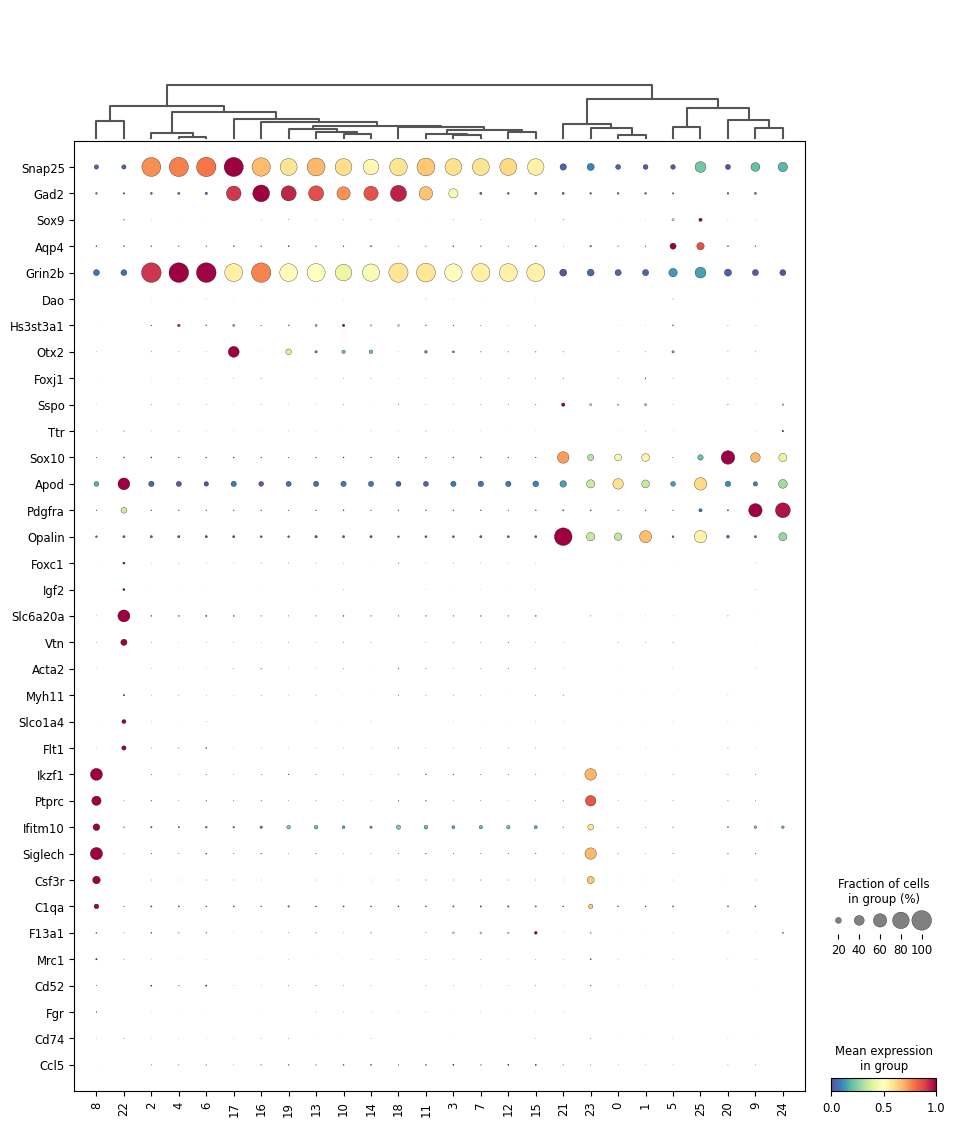

In [44]:
sc.pl.dotplot(D_LP_LGN, non_neuron_marker_gene, groupby='leiden',dendrogram='True',swap_axes = 'True',
              cmap='Spectral_r', standard_scale='var',save='D_LP_LGN_celltype_non_neuron_marker.svg')

In [47]:
D_LP_LGN_leiden =D_LP_LGN.obs['leiden']
D_LP_LGN_leiden.to_csv('F:/single cell data/LP_LGN/D_LP_LGN_leiden_1.csv')

In [50]:
cluster_dict = {2:'LP Glut 1', 4:'LGd Glut 1', 6:'LGd Glut 2',17:'SCsg Gabrr2 Gaba', 16:'RT-ZI Gnb3 Gaba',19:'PRT Mecom Gaba',13:'LGv-SPFp-SPFm Nkx2-2 Tcf7l2 Gaba',10:'PRT Tcf7l2 Gaba 1',14:'PRT Tcf7l2 Gaba 2',18:'ZI Pax6 Gaba',
                 11:'LGv-ZI Otx2 Gaba',3:'Mix',7:'SCig-an-PPT Foxb1 Glut',12:'APN C1ql2 Glut',15:'APN C1ql4 Glut',21:'Oligo 1',23:'Oligo 2',0:'Oligo 3',1:'Oligo 4',5:'Astro 1',25:'Astro 2',20:'Oligo 5',9:'OPC 1',24:'OPC 2',8:'Microglia',22:'VLMC-Peri'}

In [51]:
cluster = []
for i in cluster_dict:cluster.append((cluster_dict[i]))
D_LP_LGN.obs['cluster']= D_LP_LGN.obs['leiden']
D_LP_LGN.rename_categories(key='cluster', categories=cluster)
D_LP_LGN.write_h5ad('F:/single cell data/LP_LGN/D_LP_LGN_cluster.h5ad')

In [52]:
presubclass = pd.read_csv('F:/single cell data/LP_LGN/D_LP_LGN_leiden_presubclass.csv',index_col='cell_id')
preclass = pd.read_csv('F:/single cell data/LP_LGN/D_LP_LGN_leiden_preclass.csv',index_col='cell_id')
D_LP_LGN.obs['presubclass'] = presubclass
D_LP_LGN.obs['preclass'] = preclass
D_LP_LGN.write_h5ad('F:/single cell data/LP_LGN/D_LP_LGN_precluster.h5ad')

In [4]:
D_LP_LGN=sc.read_h5ad('F:/single cell data/LP_LGN/D_LP_LGN_preHVG.h5ad')

In [5]:
D_LP_LGN

AnnData object with n_obs × n_vars = 53961 × 19751
    obs: 'n_genes', 'percent_mito', 'n_counts', 'Doublet', 'Doublet Score', 'sample', 'tissue'
    var: 'gene_ids', 'feature_types', 'n_cells-D1_LGN-LGN', 'n_cells-D2_LGN-LGN', 'n_cells-D1_LP-LP', 'n_cells-D2_LP-LP'